# Poisson Distribution in R

Date: 2020-11-01

In [1]:
library(ggplot2)

## Scenario

Some of the sky mermaids are early risers.
They are also a vocal bunch who often contact their local MP to complain as soon as they wake up.
On a typical day, the MP receives approximately 5% of complaints from concerned sky mermaids between 4am and 5am.
The MP would like to model the distribution of complaints received between 4am and 5am on a "busy day".
It can be taken that a "busy day" is defined as receiving 100 complaints, and assumed that the event of receiving a complaint is independent of all other complaints.

-----

## Questions

**(a)** Using the definition of a *busy day*, state the distribution that models the receipt of complaints by the local MP from sky mermaids between 4am and 5am.

**(b)** State a distribution which could be used as an approximation for the complaints received.

**(c)** Plot both of the distributions.

**(d)** What is the probability the MP will receive seven complaints from the sky mermaids between 4am and 5am? Calculate the probability using both the Binomial and Poisson distributions

**(e)** What is the probability the MP will receive no more that 10 complaints from the sky mermaids between 4am and 5am?

**(f)** What is the probability the MP will receive more than five complaints between 4am and 5am?

-----

### (a)

Let $X$ be a random variable that represents the number of complaints received by the MP between 4am and 5am from the sky mermaids on a busy day.
Then $X$ can be modelled by a **binomial distribution**, with parameters $n=100$, $p=0.05$, so $X \sim B(100,0.05)$.

### (b)

For large values of $n$ and small values of $p$, a random variable following the **binomial distribution**, $B(n, p)$, has approximately the same distribution as a random variable following the **Poisson distribution** with parameter $np$, so $B(n, p) \approx Poisson(np)$.

Given this, if the MP receives 100 complaints on a busy day, 5% of which arrive between 4am and 5am, then

$$
B(100, 0.05) \approx Poisson(5).
$$

### (c)

In [2]:
x <- c(0:30)

In [3]:
df_complaints <- data.frame(x)

In [4]:
df_complaints$pmf_binom <- dbinom(x = x, size = 100, p = 0.05)

In [5]:
df_complaints$pmf_pois <- dpois(x=x, lambda = 5)

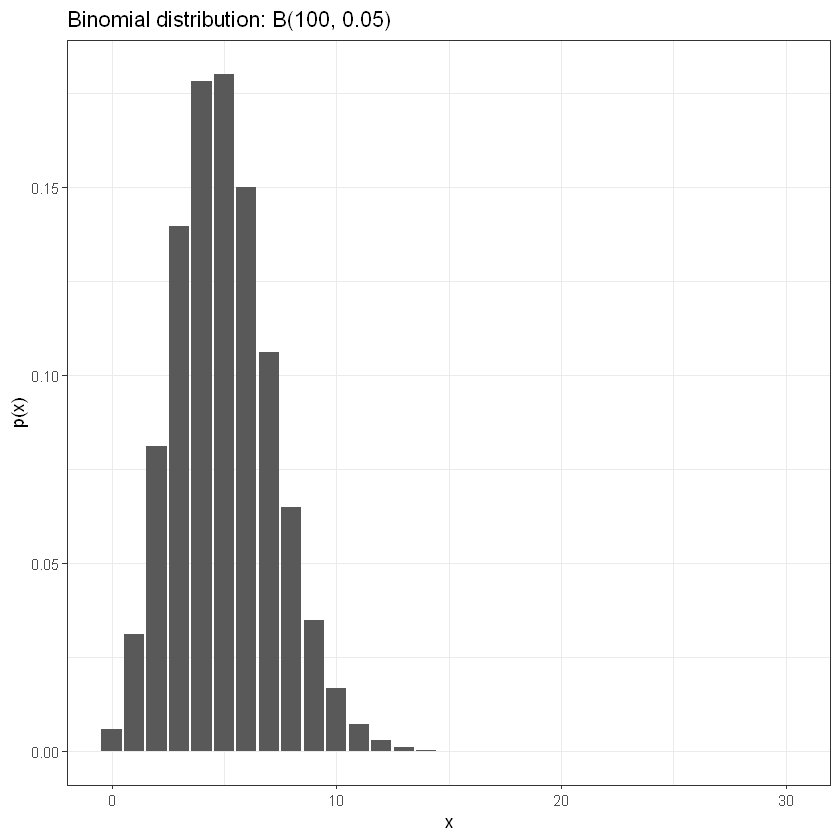

In [6]:
ggplot(data = df_complaints) +
  geom_col(mapping = aes(x = x, y = pmf_binom)) +
  theme_bw() +
  labs(title = "Binomial distribution: B(100, 0.05)",
       y = "p(x)"
  )

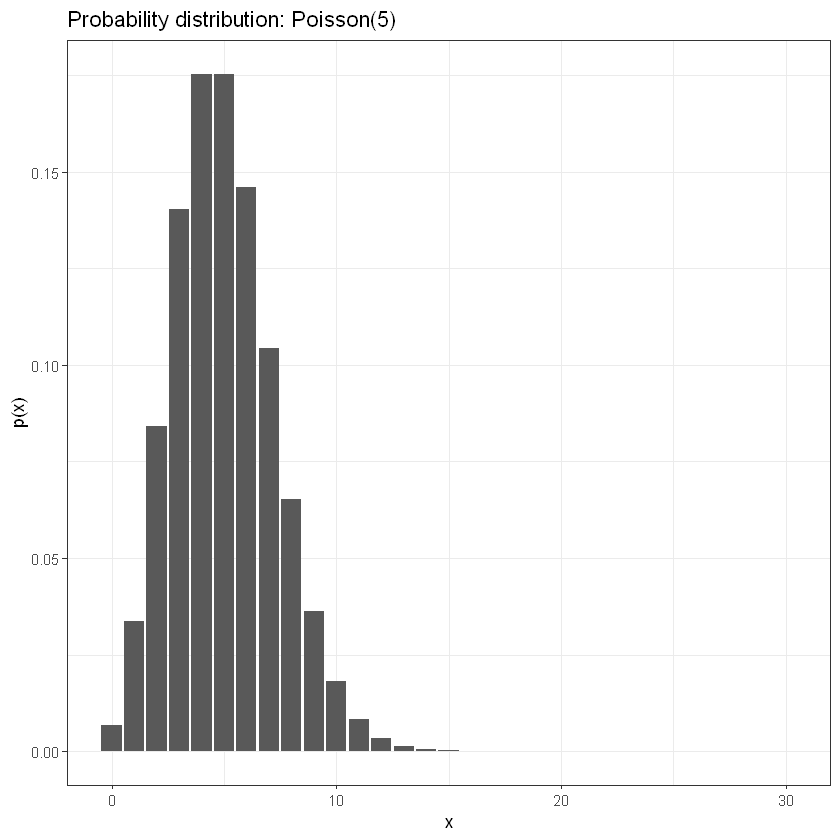

In [7]:
ggplot(data = df_complaints) +
  geom_col(mapping = aes(x = x, y = pmf_pois)) +
  theme_bw() +
  labs(title = "Probability distribution: Poisson(5)",
       y = "p(x)"
  )

### (d)

The probability the MP receives seven complaints between 4am and 5am is

#### Binomial

$$
P(X = 20) = p(20) = \binom{100}{7}0.05^{7}0.95^{93} = \ldots
$$

In [8]:
dbinom(x = 7, size = 100, p = 0.05)

[1] 0.1060255

#### Poisson

The probability the MP receives seven complaints between 4am and 5am is

$$
P(X = 20) = p(20) = e^{-5} \bigg( \frac{5^{7}}{7!} \bigg) = \ldots
$$

In [9]:
dpois(x = 7, lambda = 5)

[1] 0.1044449

### (e)

The probability the MP receives no more than 10 complaints from the sky mermaids between 4am and 5am is

#### Binomial

$$
P(X \leq 10) = F(10) = \sum_{k=0}^{10} \binom{100}{k}0.05^{k}0.95^{n-k} = \ldots
$$

In [11]:
pbinom(q = 10, size = 100, p = 0.05)

[1] 0.9885276

#### Poisson

$$
P(X \leq 10) = F(10) = e^{-5} \sum_{k=0}^{10} \frac{5^{k}}{k!} = \ldots
$$

In [12]:
ppois(q = 10,lambda = 5)

[1] 0.9863047

### (f)

The probability the MP will receive more than five complaints between 4am and 5am is

#### Binomial 

$$
P(X > 5) = 1 - F(5) = 1 - \sum_{k=0}^{5} \binom{100}{k}0.05^{k}0.95^{n-k} = \ldots
$$

In [13]:
pbinom(q = 5, size = 100, p = 0.05, lower.tail = FALSE)

[1] 0.3840009

#### Poisson

$$
P(X > 5) = 1 - F(5) = 1 - \bigg( e^{-5} \sum_{k=0}^{5} \frac{5^{k}}{k!} \bigg) = \ldots
$$

In [14]:
ppois(q = 5,lambda = 5, lower.tail = FALSE)

[1] 0.3840393